In [9]:
import requests
import time
import os.path
from os import mkdir as os_mkdir
from os import getcwd as os_getcwd
from matplotlib import pyplot as plt
import datetime
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup

In [10]:
def create_folder_structure():
    #checks if the data/$WEEKDAY folders exists
    #if not, creates them
    if os.path.isdir('data') == True:
        print('data folder exists already. skipping...')
    else:
        os_mkdir('data')
    weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for day in weekdays:
        path = os.path.join('data',day)
        if os.path.isdir(path) == True: 
            print(path + ' exists already. skipping...')
        elif os.path.isdir(path) == False: 
            os_mkdir(path)

In [11]:
def get_current_peoplecount():
    #uses the b12 homepage to check the current amount of people training
    #returns people-count as integer
    #returns an array
    #example output for 8:15am with 13 people : [0815,13]
    
    page_string = "http://b13-tuebingen.de/"
    
    #define webdriver options
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    options.add_argument('--headless')
    current_path = os_getcwd()
    driver_path = str(current_path + '/chromedriver')
    driver = webdriver.Chrome(driver_path, options=options)
    
    #render the webpage headless and parse the source to beautiful soup
    driver.get(page_string)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    #gets the utilization string from the homepage and extracts the number
    people_count_text = soup.select_one("div[class=status_text]").text
    people_count_integer = people_count_text.strip().split(' ')[0]
    current_time = datetime.datetime.now().strftime("%H%M")
    
    result = [current_time, people_count_integer]
    
    return result
    
    
    

In [12]:
def write_to_file(results):
    #write the data in a file
    #filepath is ./data/$weekday/$date.out
    
    now = datetime.datetime.now()
    weekday = now.strftime("%a").lower()
    date = now.strftime("%y_%m_%d")
    
    path_to_file = os.path.join('data',weekday,date)
    
    #runs as long as the user or something else breaks it
    print("Writing to : " + str(path_to_file) + " at: " + str(results[0]))
    with open(path_to_file, 'a') as file: 
        pars_string = str(results[0]+','+results[1]+'\n')
        file.write(pars_string)

In [13]:
def go_to_sleep(sleep_timer):
    #waits the specified amount of time
    time.sleep(sleep_timer)

In [18]:
def main():
    create_folder_structure()
    while True:
        try:
            b12_results = get_current_peoplecount()
            write_to_file(b12_results)
        except:
            print("something with the webpage was of. skipping...")
        go_to_sleep(10)
    

In [19]:
main()

data folder exists already. skipping...
data/mon exists already. skipping...
data/tue exists already. skipping...
data/wed exists already. skipping...
data/thu exists already. skipping...
data/fri exists already. skipping...
data/sat exists already. skipping...
data/sun exists already. skipping...
something with the webpage was of. skipping...
something with the webpage was of. skipping...


KeyboardInterrupt: 

#just some scrambling about plotting

In [47]:
#creating artificial data for some random day (monday)
#the data runs from 0900 to 2300
hourly_maximal = 56
b12_hours = np.arange(900, 2315, 30)
b12_utilization = np.random.randint(0,80, len(b12_hours))
datetime.time(23,15).strftime('%H')

'23'

In [48]:
for values in b12_hours:
    hours = str(values)[:-2]
    minutes = str(values)[-2:]
    print(hours+':'+minutes)

9:00
9:30
9:60
9:90
10:20
10:50
10:80
11:10
11:40
11:70
12:00
12:30
12:60
12:90
13:20
13:50
13:80
14:10
14:40
14:70
15:00
15:30
15:60
15:90
16:20
16:50
16:80
17:10
17:40
17:70
18:00
18:30
18:60
18:90
19:20
19:50
19:80
20:10
20:40
20:70
21:00
21:30
21:60
21:90
22:20
22:50
22:80
23:10


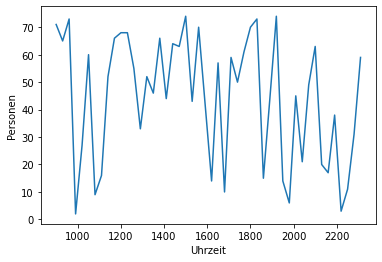

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel("Personen")
ax1.set_xlabel("Uhrzeit")
ax1.plot(b12_hours, b12_utilization)

In [50]:
import pandas as pd

In [54]:
pd.date_range(end = datetime.datetime.today(), periods = 1).to_pydatetime().tolist()

[datetime.datetime(2021, 12, 4, 21, 44, 58, 797423)]

In [58]:
pd.date_range(start = "2021-12-04, 9:00", end = "2021-12-04, 23:00").to_pydatetime().tolist()

[datetime.datetime(2021, 12, 4, 9, 0)]